# CI Final Project Alireza Rashidi




## Loading Dataset:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp /content/drive/MyDrive/Datasets/train2.zip /content/sample_data

In [ ]:
!mkdir /content/Final_Project
!unzip /content/sample_data/train2.zip -d /content/Final_Project

Archive:  /content/sample_data/train2.zip
  inflating: /content/Final_Project/train.csv  


In [ ]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df= pd.read_csv('/content/Final_Project/train.csv', sep=',')
df.head(10)

,product_id,product_title,user_id,likes,dislikes,title,comment,advantages,disadvantages,recommend
0,90213,شارژر همراه شیاومی مدل NDY-02-AN با ظرفیت 1000...,3862150,4,1,واقعاً عالیه,سلام، قبل اینکه نظرم رو بگم میخواستم به یک موض...,"[""عمر طولانی\r"",""افت بسیار کم میزان شارژ\r"",""ا...","[""ندارد""]",recommended
1,59473,یدک پولیشر میکروفایبر مهسان مدل 20119,626843,1,0,خیلی سخت حوله اش در میاد,گیره های فلزی خیلی سخت تا میشوند و لذا حوله را...,NaN,NaN,not_recommended
2,133722,لپ تاپ 15 اینچی ایسوس مدل N501VW - A,497032,6,1,اقرار بیش از حد در ایراد گرفتن,سلام دوستان،،_x000D_\nمنم مثه بعضی از دوستان ق...,"[""همه چیز که تو مشخصات اومده بجز 3 مورد کوچیک""]","[""تاچ پدش میتونست بهتر باشه از نظر سرعت پاسخ گ...",recommended
3,148509,اسپیکر بلوتوثی دیووم مدل Bluetune bean,574130,3,0,بسیار خوب,من چند سالی هست که این اسپیکرو خریدم و واقعا ح...,"[""کیفیت ساخت بسیار خوب\r"",""کیفیت صدا بسیار عال...","[""ندارد""]",recommended
4,5107,هارددیسک اکسترنال سیگیت مدل Backup Plus Deskto...,794316,1,0,هارد با کیفیت و ظاهر شیک,نزدیک به دو ساله که این هارد رو خریدم. استفاده...,"[""کیفیت ساخت خوب\r"",""ظاهر ساده و زیبا\r"",""صدای...","[""عدم مقاومت در برابر ضربه\r"",""عدم سهولت جا به...",recommended
5,134367,ماشین بازی بیبی لند مدل Top Car,3015544,10,5,لطفا موجودش کنید,افا از وقتی من اینو واسه پسرم خریدم همه بچه ها...,"[""بچه ام دیگه بیخیال ماشین ام شده همش با این ب...","[""نداره""]",recommended
6,114006,شارژر همراه لنوو با ظرفیت 10400 میلی آمپر ساعت,3007704,4,2,پاور بانک,من این پاور بانک رو حدود یک سال پیش از دیجی کا...,"[""عالی""]","[""ندارد""]",recommended
7,144139,هدفون کریتیو مدل MA200,608250,3,12,نه چندان خوب,سلام و خسته نباشید به تمامی کارکنان و بازدید ک...,"[""کیفیت ساخت""]","[""صدای پایین و بی کیفیت""]",not_recommended
8,147165,روغن موتور خودرو توتال مدل Quartz 7000 حجم 4 لیتر,467007,10,11,روغن موتور با کیفیت بسیار خوب و 4 فصل,بهترین روغن موتور برای موتورهای پژو همین روغنه...,"[""خنک نگهداشتن موتور در گرمترین روزهای تابستان...",NaN,recommended
9,116387,اسپیکر هترون مدل HSP260,2767161,3,0,یک انتخاب هوشمند,اگر با قیمتش مشکلی ندارید نسبت به صداش شک نکنی...,"[""صدای فوق العاده\r"",""بیس عالی\r"",""بلوتوث سریع...","[""خط و خش سریع میفته روش\r"",""نداشتن صفحه نمایش""]",recommended


## Data Preprocessing(For RNN model):

In [ ]:
print(df.shape)
# df = df.dropna()
# print(df.shape)

(48082, 10)


In [ ]:
data = df[['title','recommend']]
data.head(10)

,title,recommend
0,واقعاً عالیه,recommended
1,خیلی سخت حوله اش در میاد,not_recommended
2,اقرار بیش از حد در ایراد گرفتن,recommended
3,بسیار خوب,recommended
4,هارد با کیفیت و ظاهر شیک,recommended
5,لطفا موجودش کنید,recommended
6,پاور بانک,recommended
7,نه چندان خوب,not_recommended
8,روغن موتور با کیفیت بسیار خوب و 4 فصل,recommended
9,یک انتخاب هوشمند,recommended


In [ ]:
data = data.dropna()
print(df.isnull().values.any())
print(data.shape)

True
(46586, 2)


In [ ]:
# mapping labels to integer values
sentiment_label = data.recommend.factorize()
sentiment_label

(array([0, 1, 0, ..., 1, 0, 0]),
 Index(['recommended', 'not_recommended'], dtype='object'))

In [ ]:
# tokenize words in our dataset
pad_size = 210

data_text = data.title.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data_text)

vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(data_text)

#The sentences have different number of words, therefore, the length of the sequence of numbers will be different. Our model requires inputs to have equal lengths, so we will have to pad the sequence to have the chosen length of inputs
padded_sequence = pad_sequences(encoded_docs, maxlen=pad_size)

In [ ]:
print('word mappings: ', tokenizer.word_index)
print('\npadded words: \n', padded_sequence)

idx = 0
print('\nactual text: ', data_text[idx])
print('encodded text: ', encoded_docs[idx])

word mappings:  {'و': 1, 'کیفیت': 2, 'عالی': 3, 'خوب': 4, 'خیلی': 5, 'بسیار': 6, 'عالیه': 7, 'به': 8, 'با': 9, 'پیشنهاد': 10, 'بی': 11, 'از': 12, 'خوبه': 13, 'خرید': 14, 'مناسب': 15, 'زیبا': 16, 'نیست': 17, 'قیمت': 18, 'اصلا': 19, 'در': 20, 'بود': 21, 'میکنم': 22, 'محصول': 23, 'ارزش': 24, 'بد': 25, 'راضی': 26, 'این': 27, 'برای': 28, 'جنس': 29, 'نسبت': 30, 'داره': 31, 'من': 32, 'یک': 33, 'حتما': 34, 'واقعا': 35, 'که': 36, 'کاربردی': 37, 'نظر': 38, 'نداره': 39, 'پایین': 40, 'فوق': 41, 'استفاده': 42, 'نخرید': 43, 'شیک': 44, 'خوبیه': 45, 'العاده': 46, 'بخرید': 47, 'نمیکنم': 48, 'مدل': 49, 'ضعیف': 50, 'است': 51, 'خوش': 52, 'می': 53, 'بهترین': 54, 'ولی': 55, 'خوبی': 56, 'رو': 57, 'کار': 58, 'خریدم': 59, 'کیف': 60, 'هست': 61, 'بالا': 62, 'کالا': 63, 'قیمتش': 64, 'کارایی': 65, 'بررسی': 66, 'راضیم': 67, 'هم': 68, 'افتضاح': 69, 'تو': 70, 'ساعت': 71, 'ساخت': 72, 'یه': 73, 'کننده': 74, 'کفش': 75, 'ای': 76, 'دیجی': 77, 'کنم': 78, 'رنگ': 79, 'عدم': 80, 'نمی': 81, 'طراحی': 82, 'گوشی': 83, 'قابل': 84,

### train_test_validation split:

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_sequence, sentiment_label[0], test_size = 0.20, random_state = 42)
print("train set: ", X_train.shape, Y_train.shape)
print("test set: ", X_test.shape, Y_test.shape)

train set:  (37268, 210) (37268,)
test set:  (9318, 210) (9318,)


In [ ]:
validation_len = int(X_test.shape[0] / 2)
X_val = X_test[:validation_len]
Y_val = Y_test[:validation_len]

X_test = X_test[validation_len:]
Y_test = Y_test[validation_len:]

print("validation set: ", X_val.shape, Y_val.shape)
print("test set: ", X_test.shape, Y_test.shape)

print('\n', X_val[:5])
print(Y_val[:5], '\n')
print(X_test[:5])
print(Y_test[:5])

validation set:  (4659, 210) (4659,)
test set:  (4659, 210) (4659,)

 [[   0    0    0 ...    0    0   38]
 [   0    0    0 ...    0   29    4]
 [   0    0    0 ... 1070   55  743]
 [   0    0    0 ...    1    9  238]
 [   0    0    0 ...  492    8  347]]
[0 0 1 0 0] 

[[   0    0    0 ...    0    5   25]
 [   0    0    0 ...    0 1173  354]
 [   0    0    0 ...   13   32  270]
 [   0    0    0 ...    0 1080  851]
 [   0    0    0 ...   37    1   16]]
[1 0 0 0 0]


## Creating RNN Model:

In [ ]:
embedding_vector_length = 32
batch_size = 64

model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=pad_size))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))   # we have binary classification
model.compile(loss='binary_crossentropy',optimizer='adam', 
                           metrics=['accuracy'])
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 210, 32)           405952    
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 210, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_4 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_4 (Dropout)         (None, 50)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 51        
                                                                 
Total params: 422,603
Trainable params: 422,603
Non-trainable params: 0
________________________________________________

In [ ]:
history = model.fit(X_train, Y_train, epochs=5, batch_size=batch_size, validation_data=(X_val, Y_val))

Epoch 1/5
583/583 [==============================] - 471s 803ms/step - loss: 0.3981 - accuracy: 0.8227 - val_loss: 0.3166 - val_accuracy: 0.8706
Epoch 2/5
583/583 [==============================] - 466s 800ms/step - loss: 0.2828 - accuracy: 0.8875 - val_loss: 0.3048 - val_accuracy: 0.8766
Epoch 3/5
583/583 [==============================] - 468s 802ms/step - loss: 0.2559 - accuracy: 0.8991 - val_loss: 0.3051 - val_accuracy: 0.8753
Epoch 4/5
583/583 [==============================] - 466s 799ms/step - loss: 0.2421 - accuracy: 0.9031 - val_loss: 0.3072 - val_accuracy: 0.8777
Epoch 5/5
583/583 [==============================] - 467s 800ms/step - loss: 0.2320 - accuracy: 0.9051 - val_loss: 0.3103 - val_accuracy: 0.8766


In [ ]:
def learningCurve_plot(hs3, epochs3, loss, model_name):    # ploting learining curve plot for created model.
    if loss:
        plt.plot(np.arange(1, epochs3+1), hs3.history["loss"], label="train_loss")
        plt.plot(np.arange(1, epochs3+1), hs3.history["val_loss"], label="val_loss")
        plt.title(" ".join(["Learning curve loss", model_name]))
        plt.xlabel("Epoch #")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    else:   
        plt.plot(np.arange(1, epochs3+1), hs3.history["accuracy"], label="train_acc")
        plt.plot(np.arange(1, epochs3+1), hs3.history["val_accuracy"], label="val_acc")
        plt.title(" ".join(["Learning curve accuracy", model_name]))
        plt.xlabel("Epoch #")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()

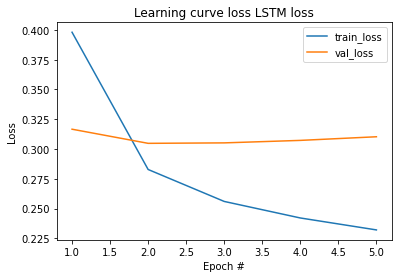

In [ ]:
learningCurve_plot(history, 5, True, "LSTM loss")

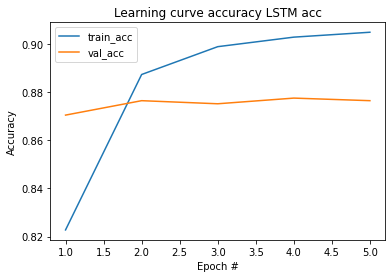

In [ ]:
learningCurve_plot(history, 5, False, "LSTM acc")

## Prediction using test set:

In [ ]:
scores = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', scores[1])
print('Test loss:', scores[0])

146/146 [==============================] - 9s 58ms/step - loss: 0.3024 - accuracy: 0.8744
Test accuracy: 0.8744365572929382
Test loss: 0.30235204100608826


### here we test some text input for verifying our models functionalty:

In [ ]:
# using some test word for prediction...

test_word = 'خوب هست'
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw, maxlen=pad_size)

prediction = int(model.predict(tw).round().item())
print("predicted result is: ", sentiment_label[1][prediction])

predicted result is:  recommended


## Using SVM model on the title column:
in this part i used converted title data for training svm model.

In [ ]:
svclassifier = svm.SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

SVC()

In [ ]:
y_pred_val = svclassifier.predict(X_val)

val_cf = confusion_matrix(Y_val, y_pred_val)
print(val_cf)
print(classification_report(Y_val, y_pred_val))

[[3241    0]
 [1417    1]]
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      3241
           1       1.00      0.00      0.00      1418

    accuracy                           0.70      4659
   macro avg       0.85      0.50      0.41      4659
weighted avg       0.79      0.70      0.57      4659



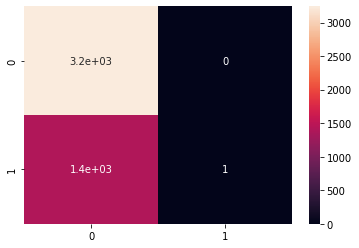

In [ ]:
sns.heatmap(val_cf, annot=True)

In [ ]:
y_pred_test = svclassifier.predict(X_test)
test_cf = confusion_matrix(Y_test, y_pred_test)
print(test_cf)
print(classification_report(Y_test, y_pred_test))

[[3220   10]
 [1426    3]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82      3230
           1       0.23      0.00      0.00      1429

    accuracy                           0.69      4659
   macro avg       0.46      0.50      0.41      4659
weighted avg       0.55      0.69      0.57      4659



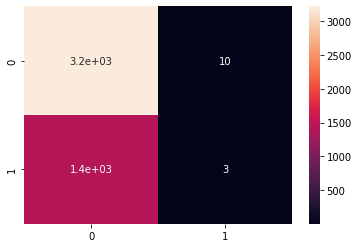

In [ ]:
sns.heatmap(test_cf, annot=True)

In [ ]:
test_word = 'بد'
tw = tokenizer.texts_to_sequences([test_word])
tw = pad_sequences(tw, maxlen=pad_size)

prediction = svclassifier.predict(tw)[0]
print("predicted result is: ", sentiment_label[1][prediction])

predicted result is:  recommended


from the above results we can see that our SVM model on text data, is not as good as RNN model.

## Using SVM model(for likes/dislikes column):
this model's preprocessing is bit much different from RNN model

In [ ]:
data = df[['likes','dislikes']]
labels = df['recommend']
data.head(10)

,likes,dislikes
0,4,1
1,1,0
2,6,1
3,3,0
4,1,0
5,10,5
6,4,2
7,3,12
8,10,11
9,3,0


In [ ]:
print(data.isnull().values.any())
print(labels.isnull().values.any())
features = data.to_numpy()
labels = labels.factorize()
print('\nselected features shape: ', features.shape)
print('\nencoded labels for problem: ', labels)

False
False

selected features shape:  (48082, 2)

encoded labels for problem:  (array([0, 1, 0, ..., 1, 0, 0]), Index(['recommended', 'not_recommended'], dtype='object'))


## Some data visualizations based on labels and likes/dislikes:

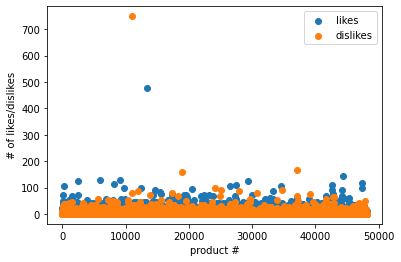

In [ ]:
plt.scatter(range(1, features.shape[0]+1), features[:,0], label='likes')
plt.scatter(range(1, features.shape[0]+1), features[:,1], label='dislikes')
plt.xlabel('product #')
plt.ylabel('# of likes/dislikes')
plt.legend()

Text(0, 0.5, '# of likes')

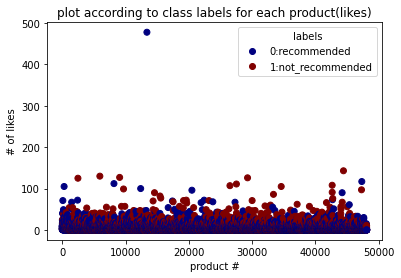

In [ ]:
s = plt.scatter(range(1, features.shape[0]+1), features[:,0], c=labels[0], cmap="jet")
plt.legend(handles=s.legend_elements()[0],
           labels=['0:recommended', '1:not_recommended'],
           title="labels")

plt.title('plot according to class labels for each product(likes)')
plt.xlabel('product #')
plt.ylabel('# of likes')

Text(0, 0.5, '# of dislikes')

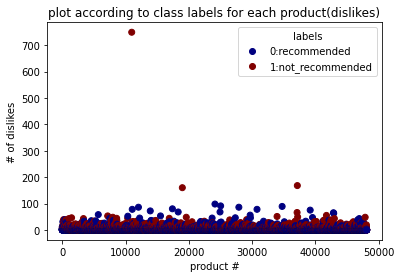

In [ ]:
s = plt.scatter(range(1, features.shape[0]+1), features[:,1], c=labels[0], cmap="jet")
plt.legend(handles=s.legend_elements()[0],
           labels=['0:recommended', '1:not_recommended'],
           title="labels")

plt.title('plot according to class labels for each product(dislikes)')
plt.xlabel('product #')
plt.ylabel('# of dislikes')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels[0], test_size = 0.20, random_state = 42)
print("train set: ", X_train.shape, Y_train.shape)
print("test set: ", X_test.shape, Y_test.shape)

train set:  (38465, 2) (38465,)
test set:  (9617, 2) (9617,)


In [ ]:
validation_len = int(X_test.shape[0] / 2)
X_val = X_test[:validation_len]
Y_val = Y_test[:validation_len]

X_test = X_test[validation_len:]
Y_test = Y_test[validation_len:]

print("validation set: ", X_val.shape, Y_val.shape)
print("test set: ", X_test.shape, Y_test.shape)

print('\n', X_val[:5])
print(Y_val[:5], '\n')
print(X_test[:5])
print(Y_test[:5])

validation set:  (4808, 2) (4808,)
test set:  (4809, 2) (4809,)

 [[3 2]
 [0 0]
 [2 0]
 [1 0]
 [1 1]]
[1 1 0 0 0] 

[[3 8]
 [0 0]
 [2 0]
 [1 0]
 [1 0]]
[0 0 0 0 0]


## creating model and fiting it on the data:

In [ ]:
svclassifier = svm.SVC(kernel='rbf')
svclassifier.fit(X_train, Y_train)

SVC()

## SVM Model evaluation:

In [ ]:
y_pred_val = svclassifier.predict(X_val)

In [ ]:
val_cf = confusion_matrix(Y_val, y_pred_val)
print(val_cf)
print(classification_report(Y_val, y_pred_val))

[[3264   28]
 [1461   55]]
              precision    recall  f1-score   support

           0       0.69      0.99      0.81      3292
           1       0.66      0.04      0.07      1516

    accuracy                           0.69      4808
   macro avg       0.68      0.51      0.44      4808
weighted avg       0.68      0.69      0.58      4808



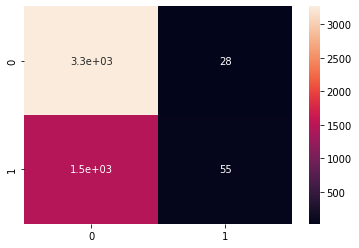

In [ ]:
sns.heatmap(val_cf, annot=True)

In [ ]:
y_pred_test = svclassifier.predict(X_test)
test_cf = confusion_matrix(Y_test, y_pred_test)
print(test_cf)
print(classification_report(Y_test, y_pred_test))

[[3318   40]
 [1386   65]]
              precision    recall  f1-score   support

           0       0.71      0.99      0.82      3358
           1       0.62      0.04      0.08      1451

    accuracy                           0.70      4809
   macro avg       0.66      0.52      0.45      4809
weighted avg       0.68      0.70      0.60      4809



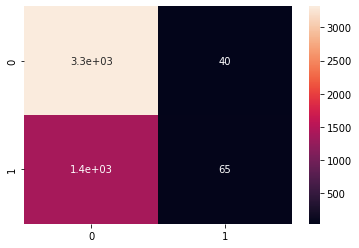

In [ ]:
sns.heatmap(test_cf, annot=True)